# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from faker import Faker
fake = Faker()

### Generating datasets

- #### Employee Dataset:

In [4]:
name = [fake.first_name() for i in range(10000)]
last_name = [fake.last_name() for i in range(10000)]
employee_id = [fake.random_number(digits=5, fix_len=False) for i in range(10000)]
phone_number = [fake.numerify('(%#%)#%#-#%#%') for i in range(10000)]


In [5]:
state_list = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York',' New Jersey', 'Pennsylvania', 'Maryland', 'Delaware', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia','Florida','Washington D.C']
state = [random.choice(state_list) for i in range(10000)]

In [6]:
employee_data = {'Name' : name,
                 'Last Name': last_name,
                 'Employee ID' : employee_id,
                 'Phone Number' : phone_number,
                 'State' : state
                }
employee_dataset = pd.DataFrame(employee_data)

employee_dataset

,Name,Last Name,Employee ID,Phone Number,State
0,Jennifer,Acosta,13276,(918)131-3415,Rhode Island
1,John,Campbell,64430,(369)396-6868,Vermont
2,Tracy,Brown,37086,(512)512-0678,Washington D.C
3,Dale,Matthews,73741,(208)539-0204,Virginia
4,Sharon,Rollins,38302,(416)586-0321,Connecticut
...,...,...,...,...,...
9995,Theodore,King,50871,(151)448-2252,New Hampshire
9996,Felicia,Holmes,56610,(955)621-0421,North Carolina
9997,Angela,Sims,58644,(387)246-6558,Georgia
9998,Austin,Morse,78100,(259)727-4856,Maine


- #### Salary Dataset:

In [7]:
department_id = [fake.numerify('%#%##%') for i in range(10000)]
#department_id = [fake.random_number(digits=6, fix_len = True) for i in range(10000)]

salary = [fake.random_int(min=50000, max=150000, step = 100) for i in range(10000)]

In [8]:
salary_data = {'Employee ID' : employee_id,
               'Department ID' : department_id,
               'Salary' : salary
              
              }

salary_dataset = pd.DataFrame(salary_data)

salary_dataset

,Employee ID,Department ID,Salary
0,13276,138412,129800
1,64430,842011,111700
2,37086,144835,83800
3,73741,766437,95100
4,38302,711222,73500
...,...,...,...
9995,50871,188919,140200
9996,56610,136947,128200
9997,58644,123711,53300
9998,78100,478953,114400


- #### Department Dataset:

In [9]:
department_list = ['Education', 'Energy', 'Health & Human Services', 'Art', 'Housing & Urban Development', 'Economic Affairs', 'Defense','Transportation']
department_name = [random.choice(department_list) for i in range(10000)]
department_data = { 'Department ID' : department_id,
                   'Department_Name' : department_name
                  }
department_dataset = pd.DataFrame(department_data)

department_dataset

,Department ID,Department_Name
0,138412,Energy
1,842011,Art
2,144835,Transportation
3,766437,Art
4,711222,Economic Affairs
...,...,...
9995,188919,Education
9996,136947,Housing & Urban Development
9997,123711,Health & Human Services
9998,478953,Energy


In [10]:
Emp_Sal = employee_dataset.merge(salary_dataset, how='right')
Data = Emp_Sal.merge(department_dataset, how='right')

Data

,Name,Last Name,Employee ID,Phone Number,State,Department ID,Salary,Department_Name
0,Jennifer,Acosta,13276,(918)131-3415,Rhode Island,138412,129800,Energy
1,Alicia,Torres,52064,(966)561-0947,Florida,138412,67400,Energy
2,John,Campbell,64430,(369)396-6868,Vermont,842011,111700,Art
3,Tracy,Brown,37086,(512)512-0678,Washington D.C,144835,83800,Transportation
4,Chris,Burns,37086,(121)554-8954,Rhode Island,144835,83800,Transportation
...,...,...,...,...,...,...,...,...
11052,Theodore,King,50871,(151)448-2252,New Hampshire,188919,140200,Education
11053,Felicia,Holmes,56610,(955)621-0421,North Carolina,136947,128200,Housing & Urban Development
11054,Angela,Sims,58644,(387)246-6558,Georgia,123711,53300,Health & Human Services
11055,Austin,Morse,78100,(259)727-4856,Maine,478953,114400,Energy


### Visualisations

- #### Average salary of each department: 

In [11]:
a = Data.groupby(['Department_Name']).agg(
    Average_Salary = ('Salary', 'mean')
    )
a = a.reset_index(drop=False)
a

,Department_Name,Average_Salary
0,Art,99241.330502
1,Defense,100657.109915
2,Economic Affairs,101010.318021
3,Education,101062.446352
4,Energy,101363.011696
5,Health & Human Services,100358.625954
6,Housing & Urban Development,98467.842324
7,Transportation,99288.122333


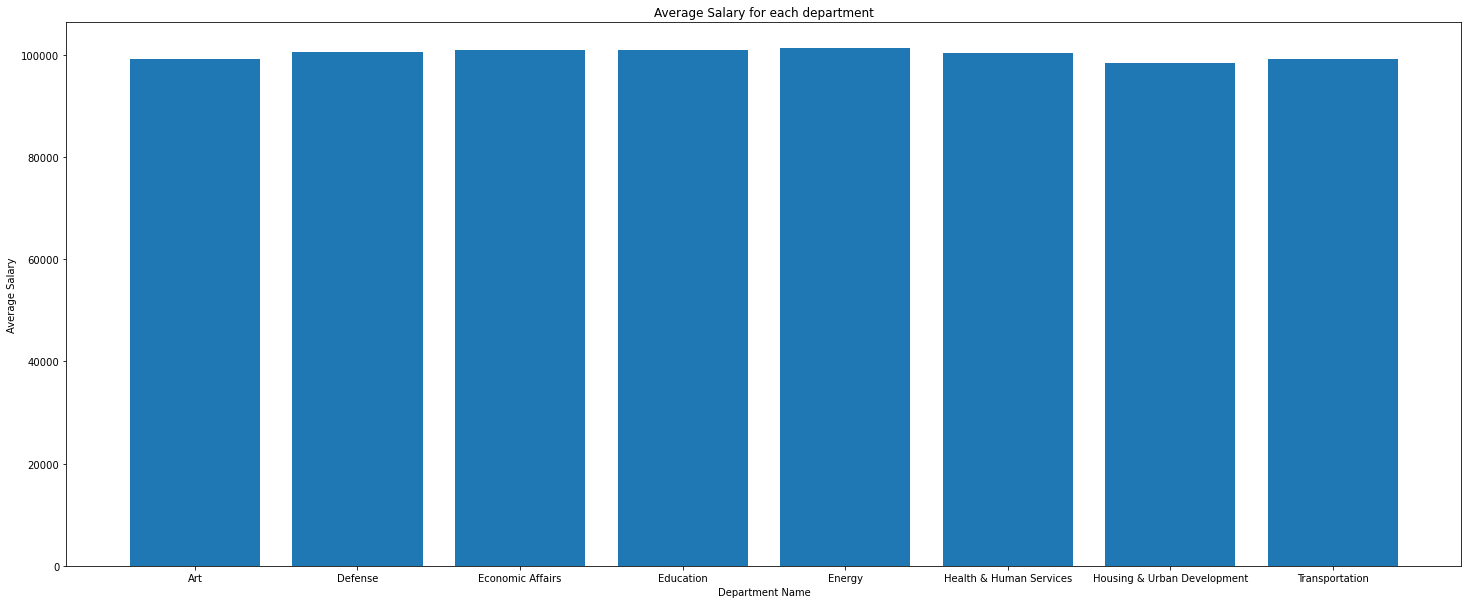

In [12]:
plt.figure(figsize = (25,10))
plt.bar(a["Department_Name"], a["Average_Salary"])
plt.xlabel("Department Name")
plt.ylabel("Average Salary")
plt.title("Average Salary for each department")
plt.show()

- #### Total number of employees living in each state for each department: 

In [13]:
b = Data.groupby(['State','Department_Name']).agg(
    No_of_employees = ('Name', 'count')
    )
b = b.reset_index(drop=False)
b

,State,Department_Name,No_of_employees
0,New Jersey,Art,77
1,New Jersey,Defense,87
2,New Jersey,Economic Affairs,79
3,New Jersey,Education,94
4,New Jersey,Energy,84
...,...,...,...
131,Washington D.C,Education,81
132,Washington D.C,Energy,70
133,Washington D.C,Health & Human Services,85
134,Washington D.C,Housing & Urban Development,89


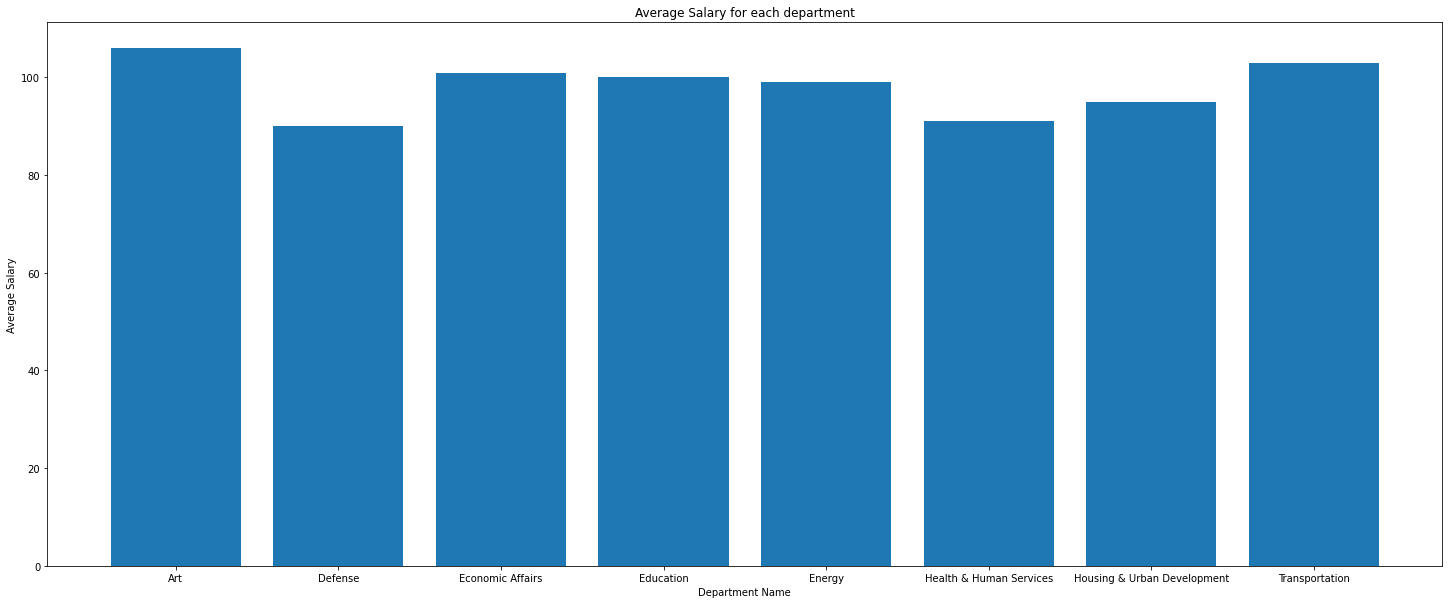

In [14]:
plt.figure(figsize = (25,10))
plt.bar(b["Department_Name"], b["No_of_employees"])
plt.xlabel("Department Name",)
plt.ylabel("Average Salary")
plt.title("Average Salary for each department")
plt.show()

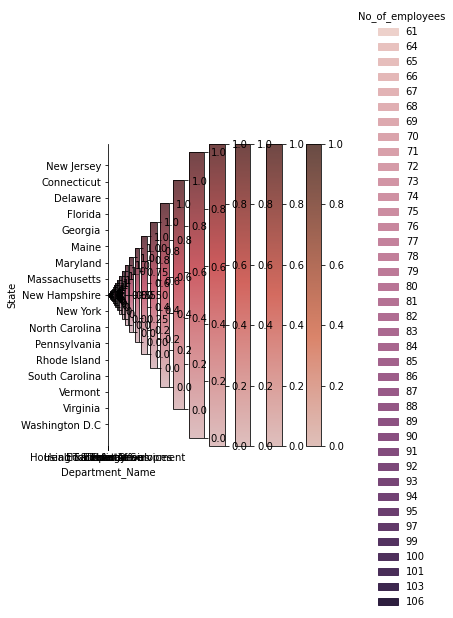

In [15]:
plot = sns.displot(b, x="Department_Name", y="State", hue = 'No_of_employees', cbar = True )
plot.ax.tick_params(labelrotation = 0)

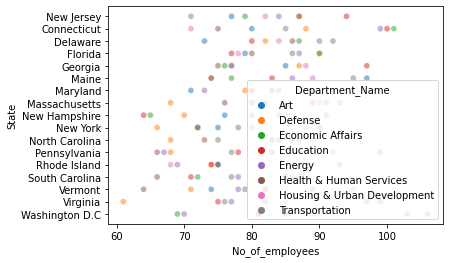

In [16]:
b1 = b.Department_Name
b2 = b.State
h = b.No_of_employees
plot = sns.scatterplot(x= h, y = b2, hue = b1, alpha = 0.5)

- #### Salary distribution of different states: 

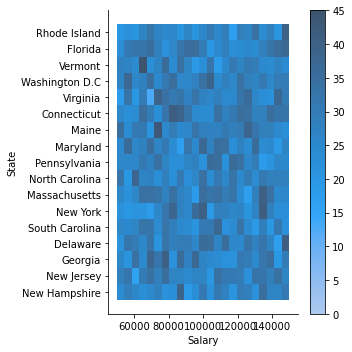

In [17]:
plot = sns.displot(Data, x="Salary", y="State", cbar = True)
plot.ax.tick_params(labelrotation = 0)

- #### Salary distribution of different departments:

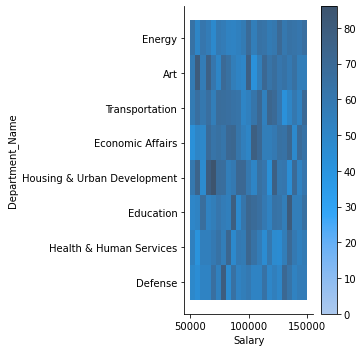

In [18]:
plot = sns.displot(Data, x="Salary", y="Department_Name", cbar = True)
plot.ax.tick_params(labelrotation = 0)